loading data from Data.rar file 

In [2]:
%pylab
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

Using matplotlib backend: QtAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
train_data1=np.load('data0.npy')
lab_data1=np.load('lab0.npy')

16


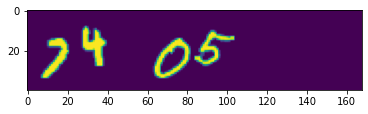

In [4]:
i=9997
#plt.plot(train_data1[i])
imshow(train_data1[i])
print(lab_data1[i])

In [5]:
print(train_data1[0].shape)

(40, 168)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(train_data1, lab_data1, test_size=0.33)


In [7]:
print(X_train.shape, X_test.shape)

(6700, 40, 168) (3300, 40, 168)


In [8]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [10]:
model=tf.keras.Sequential()

In [11]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu', input_shape=(40,168,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(37, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 40, 168, 64)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 84, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 20, 84, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 84, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 42, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 10, 42, 32)       

In [12]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


In [13]:
X_train = X_train.reshape(-1,40,168,1)
X_test = X_test.reshape(-1,40, 168, 1)

In [14]:
model_log=model.fit(X_train, y_train,
          batch_size=50,
          epochs=50,
          verbose=1,
          validation_split=.3)

Epoch 1/50
94/94 [==============================] - 6s 54ms/step - loss: 3.3038 - accuracy: 0.0563 - val_loss: 3.2865 - val_accuracy: 0.0507
Epoch 2/50
94/94 [==============================] - 5s 52ms/step - loss: 3.2114 - accuracy: 0.0610 - val_loss: 3.2807 - val_accuracy: 0.0587
Epoch 3/50
94/94 [==============================] - 5s 53ms/step - loss: 3.1920 - accuracy: 0.0676 - val_loss: 3.2378 - val_accuracy: 0.0547
Epoch 4/50
94/94 [==============================] - 5s 53ms/step - loss: 3.1770 - accuracy: 0.0723 - val_loss: 3.2398 - val_accuracy: 0.0612
Epoch 5/50
94/94 [==============================] - 5s 54ms/step - loss: 3.1497 - accuracy: 0.0853 - val_loss: 3.1941 - val_accuracy: 0.0682
Epoch 6/50
94/94 [==============================] - 5s 54ms/step - loss: 3.1256 - accuracy: 0.0953 - val_loss: 3.2206 - val_accuracy: 0.0662
Epoch 7/50
94/94 [==============================] - 5s 54ms/step - loss: 3.0923 - accuracy: 0.1000 - val_loss: 3.2183 - val_accuracy: 0.0632
Epoch 8/50
94

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])

In [ ]:
predictions = model.predict(X_test)
predictions[0]

In [ ]:
np.argmax(predictions[0])

In [ ]:
X_test = X_test.reshape(-1,40, 168)
X_test.shape

In [ ]:
plt.xticks([])
plt.yticks([])
plt.xlabel([y_train[0]])
plt.imshow(X_test[0],cmap=plt.cm.binary)